In [12]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [2]:
data_f2 = pd.read_csv(r"example_f_2.csv")
data_f3 = pd.read_csv(r"example_f_3.csv")

# Isolation Forest for dummies

Isolation Forests(IF), similar to Random Forests, are build based on decision trees. And since there are no pre-defined labels here, it is an unsupervised model.

IsolationForests were built based on the fact that anomalies are the data points that are “few and different”.

In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations.

## ITree

## Binary Search Tree (BST)

Binary Search Tree is a node-based binary tree data structure which has the following properties:

    - The left subtree of a node contains only nodes with keys lesser than the node’s key.
    - The right subtree of a node contains only nodes with keys greater than the node’s key.
    - The left and right subtree each must also be a binary search tree.

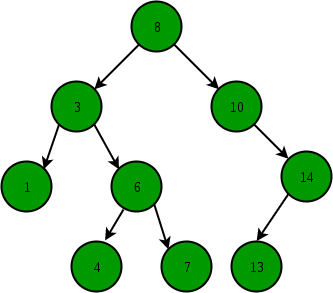

## Building the ITree

Algotihm:<br>
>1. Take a random sub-sample of the data.<br>
>2. Build nodes:<br>
>>2.1. Select a <b>random</b> feature<br>
>>2.2. Select a <b>random</b> treshold $$t ∈ [min; max]$$
>>2.3. Branching: 
>>>left node - $data<=t$ <br>
>>>right node - $data>t$

This process is repeated till each data point form the sub-set is completly isolated or till max depth(we dont use but just for information) is reached

## Example

In [3]:
data_f2

,f1,f2
0,0,1
1,0,1
2,1,2
3,1,2
4,2,3
5,2,3
6,3,4
7,3,4
8,4,5
9,4,5


In [11]:
iso_f2 = IsolationForest().fit(data_f2)

[Text(0.5, 0.9, 'f2 <= 4.91\nsamples = 11\nvalue = 0.444'),
 Text(0.25, 0.7, 'f2 <= 1.147\nsamples = 8\nvalue = 0.568'),
 Text(0.125, 0.5, 'samples = 2\nvalue = 0.979'),
 Text(0.375, 0.5, 'f2 <= 2.386\nsamples = 6\nvalue = 0.431'),
 Text(0.25, 0.3, 'samples = 2\nvalue = 0.129'),
 Text(0.5, 0.3, 'f2 <= 4.0\nsamples = 4\nvalue = 0.582'),
 Text(0.375, 0.1, 'samples = 2\nvalue = 0.645'),
 Text(0.625, 0.1, 'samples = 2\nvalue = 0.519'),
 Text(0.75, 0.7, 'f2 <= 5.562\nsamples = 3\nvalue = 0.115'),
 Text(0.625, 0.5, 'samples = 2\nvalue = 0.083'),
 Text(0.875, 0.5, 'samples = 1\nvalue = 0.178')]

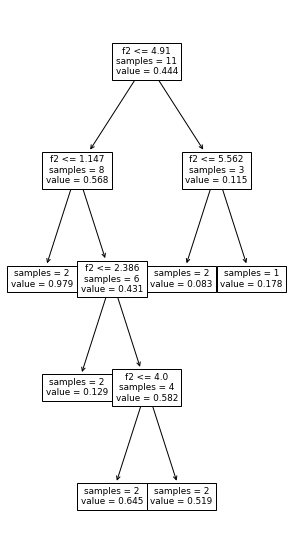

In [13]:
plt.figure(figsize=[5,10])
tree.plot_tree(iso_f2.estimators_[0], impurity=False, feature_names=['f1', 'f2'])

## Example 2

In [14]:
data_f3

,f1,f2,f3
0,0,1,2
1,0,1,2
2,1,2,3
3,1,2,3
4,2,3,4
5,2,3,4
6,3,4,5
7,3,4,5
8,4,5,6
9,4,5,6


In [15]:
iso_f3 = IsolationForest().fit(data_f3)

[Text(0.5555555555555556, 0.9, 'f2 <= 9.236\nsamples = 11\nvalue = 0.545'),
 Text(0.4444444444444444, 0.7, 'f3 <= 3.445\nsamples = 10\nvalue = 0.536'),
 Text(0.2222222222222222, 0.5, 'f1 <= 0.52\nsamples = 4\nvalue = 0.489'),
 Text(0.1111111111111111, 0.3, 'samples = 2\nvalue = 0.357'),
 Text(0.3333333333333333, 0.3, 'samples = 2\nvalue = 0.621'),
 Text(0.6666666666666666, 0.5, 'f2 <= 3.079\nsamples = 6\nvalue = 0.567'),
 Text(0.5555555555555556, 0.3, 'samples = 2\nvalue = 0.442'),
 Text(0.7777777777777778, 0.3, 'f1 <= 3.489\nsamples = 4\nvalue = 0.63'),
 Text(0.6666666666666666, 0.1, 'samples = 2\nvalue = 0.474'),
 Text(0.8888888888888888, 0.1, 'samples = 2\nvalue = 0.786'),
 Text(0.6666666666666666, 0.7, 'samples = 1\nvalue = 0.636')]

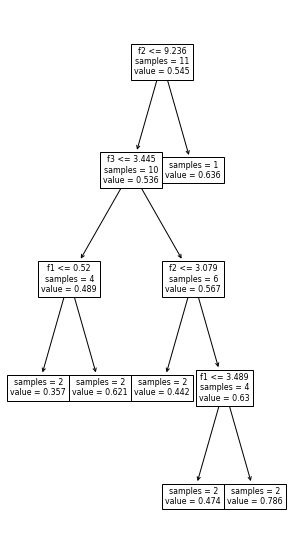

In [16]:
plt.figure(figsize=[5,10])
tree.plot_tree(iso_f3.estimators_[0], impurity=False, feature_names=['f1', 'f2', 'f3'])

## Isolation Forest algorithm

Isolation forest creates n iTrees the default n_estimators is 100 from skelarn. The algorithm will create a forest of 100 itrees in in this case.

## Anomaly score

The algorithm for computing the anomaly score of a data point is based on the observation that the structure of iTrees is equivalent to that of Binary Search Trees (BST): a termination to an external node of the iTree corresponds to an unsuccessful search in the BST. As a consequence, the estimation of average $h(x)$ for external node terminations is the same as that of the unsuccessful searches in BST, that is
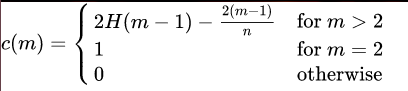
where $n$ is the testing data size, $m$ is the size of the sample set and $H$ is the harmonic number, which can be estimated by $ H ( i ) = l n ( i ) + γ $, where $γ = 0.5772156649$ is the Euler-Mascheroni constant.

The value of $c(m)$ above represents the average of $h ( x )$ given $m$, so we can use it to normalise $h ( x )$ and get an estimation of the anomaly score for a given instance x:

$$s ( x , m ) = 2 − E ( h ( x ) ) c ( m ) $$

where $E ( h ( x ) )$ is the average value of $h ( x )$ from a collection of iTrees. It is interesting to note that for any given instance $x$:

>if $s$ is close to 1 then $x$ is very likely to be an anomaly<br>
>if $s$ is smaller than 0.5 then $x$ is likely to be a normal value<br>
>if for a given sample all instances are assigned an anomaly score of around 0.5, then it is safe to assume that the sample doesn't have any anomaly

## Example 

In [19]:
df = data_f2.copy()
df['score'] = iso_f2.decision_function(data_f2)
df['anomaly'] = iso_f2.predict(data_f2)
print(len(iso_f2.estimators_))
df

100


,f1,f2,score,anomaly
0,0,1,-0.030423,-1
1,0,1,-0.030423,-1
2,1,2,0.045597,1
3,1,2,0.045597,1
4,2,3,0.062043,1
5,2,3,0.062043,1
6,3,4,0.058636,1
7,3,4,0.058636,1
8,4,5,0.013371,1
9,4,5,0.013371,1


1


[Text(0.6, 0.9, 'f1 <= 3.245\nsamples = 11\nvalue = 0.53'),
 Text(0.4, 0.7, 'f2 <= 3.602\nsamples = 8\nvalue = 0.597'),
 Text(0.3, 0.5, 'f2 <= 2.29\nsamples = 6\nvalue = 0.707'),
 Text(0.2, 0.3, 'f1 <= 0.081\nsamples = 4\nvalue = 0.662'),
 Text(0.1, 0.1, 'samples = 2\nvalue = 0.6'),
 Text(0.3, 0.1, 'samples = 2\nvalue = 0.725'),
 Text(0.4, 0.3, 'samples = 2\nvalue = 0.797'),
 Text(0.5, 0.5, 'samples = 2\nvalue = 0.266'),
 Text(0.8, 0.7, 'f2 <= 7.392\nsamples = 3\nvalue = 0.352'),
 Text(0.7, 0.5, 'samples = 2\nvalue = 0.468'),
 Text(0.9, 0.5, 'samples = 1\nvalue = 0.12')]

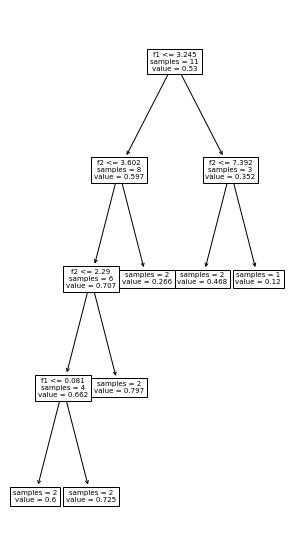

In [20]:
df = data_f2.copy()
iso_f2 = IsolationForest(n_estimators=1).fit(data_f2)
df['score'] = iso_f2.decision_function(data_f2)
df['anomaly'] = iso_f2.predict(data_f2)
print(len(iso_f2.estimators_))
df
plt.figure(figsize=[5,10])
tree.plot_tree(iso_f2.estimators_[0], impurity=False, feature_names=['f1', 'f2'])

In [21]:
df


,f1,f2,score,anomaly
0,0,1,0.084931,1
1,0,1,0.084931,1
2,1,2,0.084931,1
3,1,2,0.084931,1
4,2,3,0.005125,1
5,2,3,0.005125,1
6,3,4,-0.090027,-1
7,3,4,-0.090027,-1
8,4,5,-0.090027,-1
9,4,5,-0.090027,-1


### Explanation

Why are these ouliers?
This a bit of a bad example because of the randomnes using only one estimator will give you random outliers but visual is okay we can see the tree and we can see how it makes decision. It gives score to all points on the base of how much does it need to go in depth in the tree to make the point. The points that are closer to the root(aka the first node) and who dont have child nodes(last nodes) are consider outliers

In this example it will consider otulier does who are:
    on the right f1>3.245 then it splits to f2<=7.39 and f2>7.39 but both are outliers
    on the left f1<=3.245 (f1==3 goes in here) and f2>3.6 are outliers because are closest to the top

# Notes

## Standartization and normalization

Here they are not important because of how the tree is build.
Since each node is related to a feature and the treshold is choosed on the min/max value of the feature. The node doesnt care if it will pick a value from -inf to +inf or -1 to 1. The Standartization shouldnt change the result.